## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [ ]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [ ]:
data = pd.read_csv('FB.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2249,2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200
2250,2021-04-29,330.119995,331.809998,321.609985,329.510010,329.510010,56526800
2251,2021-04-30,326.140015,329.820007,324.500000,325.079987,325.079987,26322000
2252,2021-05-03,326.170013,328.549988,321.839996,322.579987,322.579987,18719500


In [ ]:
#reading the data and converting the Date column into pandas datetime object and also making it the index
data = pd.read_csv('FB.csv')
data.index = data['Date']
data.drop(['Date'], axis = 1, inplace = True)
data.index = pd.to_datetime(data.index)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200
2021-04-29,330.119995,331.809998,321.609985,329.510010,329.510010,56526800
2021-04-30,326.140015,329.820007,324.500000,325.079987,325.079987,26322000


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2.254000e+03
mean,129.939769,131.476136,128.367378,129.968860,129.968860,3.170186e+07
std,73.155116,74.065004,72.269093,73.187629,73.187629,2.817174e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,74.000000,74.447500,73.012501,73.649997,73.649997,1.615475e+07
50%,125.979999,126.795002,124.950001,126.145000,126.145000,2.306145e+07
75%,180.379997,181.817497,178.347500,180.177494,180.177494,3.690652e+07
max,330.119995,331.809998,324.500000,329.510010,329.510010,5.735764e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2254 entries, 2012-05-18 to 2021-05-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2254 non-null   float64
 1   High       2254 non-null   float64
 2   Low        2254 non-null   float64
 3   Close      2254 non-null   float64
 4   Adj Close  2254 non-null   float64
 5   Volume     2254 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.3 KB


In [ ]:
data.isnull().sum() #checking if there are any null or infinite values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualizing the Data

In [ ]:
data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [ ]:
data

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2021-04-28,307.100006
2021-04-29,329.510010
2021-04-30,325.079987


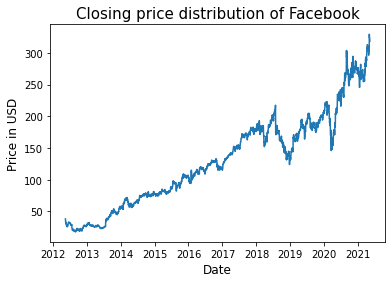

In [ ]:
plot.plot(data['Close'])
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Facebook", fontsize=15)
plot.show()

In [ ]:
df = data['Close']

# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

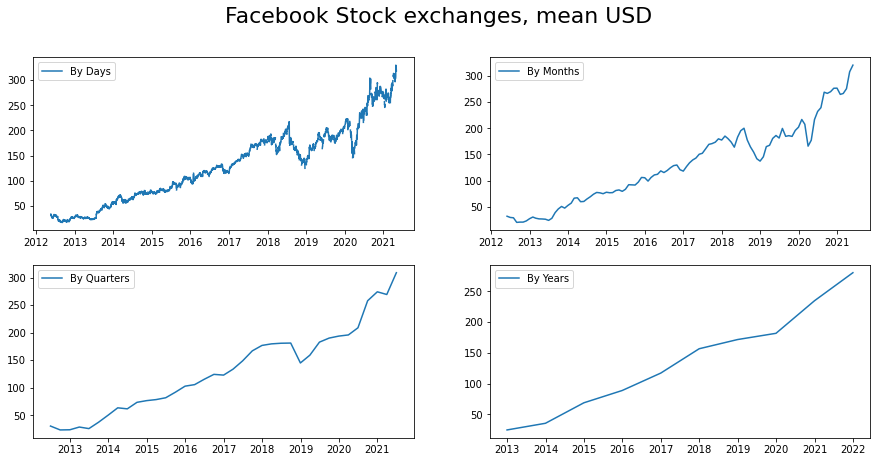

In [ ]:
# PLOTS
fig = plot.figure(figsize=[15, 7])
plot.suptitle('Facebook Stock exchanges, mean USD', fontsize=22)

plot.subplot(221)
plot.plot(df, '-', label='By Days')
plot.legend()

plot.subplot(222)
plot.plot(df_month, '-', label='By Months')
plot.legend()

plot.subplot(223)
plot.plot(df_Q, '-', label='By Quarters')
plot.legend()

plot.subplot(224)
plot.plot(df_year, '-', label='By Years')
plot.legend()

# plt.tight_layout()
plot.show()

# Checking Stationarity of the data

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=22,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

In [ ]:
df = df.fillna(method='ffill')

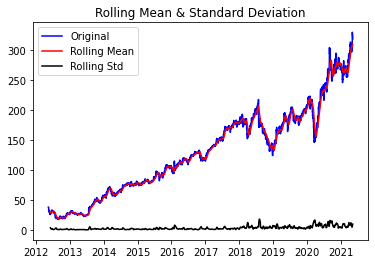

ADF Stastistic: 0.290173
p-value: 0.976889
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
test_stationarity(df)

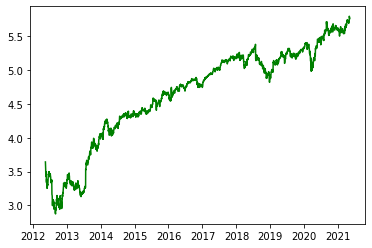

In [ ]:
ts_log = np.log(data['Close'])
plot.plot(ts_log,color="green")
plot.show()

In [ ]:
data['Log transformed'] = ts_log 

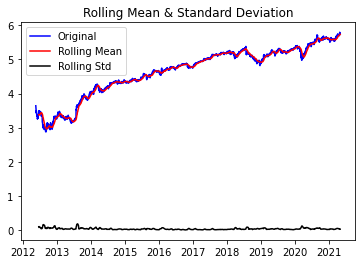

ADF Stastistic: -1.119144
p-value: 0.707377
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
test_stationarity(data['Log transformed'])

In [ ]:
[1 2 3 4 5 6 7 8 9 10] - [NaN 1 2 3 4 5 6 7 8 9] = [Nan ...]

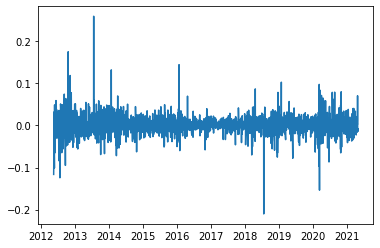

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

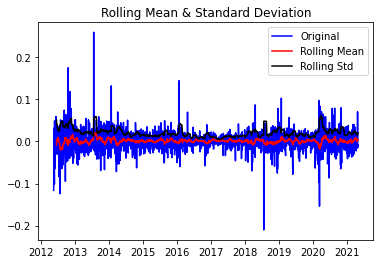

ADF Stastistic: -16.092886
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
test_stationarity(ts_log_diff.dropna())

In [ ]:
data['Shifted Log transformed'] = ts_log_diff

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

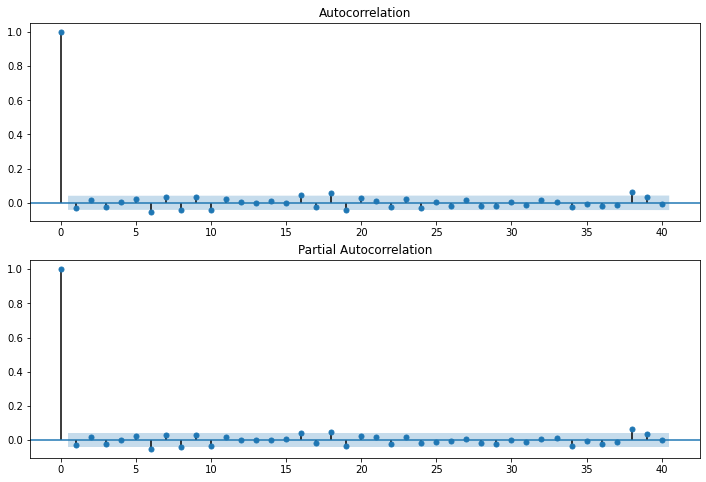

In [ ]:
fig = plot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax2)

# Making Predictions

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Printing Predicted vs Expected Values...


predicted = 199.265142,   expected = 197.509995,   error = 0.888637  %
predicted = 197.420137,   expected = 197.929993,   error = 0.257594  %
predicted = 197.861561,   expected = 198.820007,   error = 0.482067  %
predicted = 198.755603,   expected = 199.789993,   error = 0.517739  %
predicted = 199.726038,   expected = 198.970001,   error = 0.379976  %
predicted = 198.889315,   expected = 202.000000,   error = 1.539943  %
predicted = 201.955104,   expected = 201.639999,   error = 0.156271  %
predicted = 201.562695,   expected = 199.699997,   error = 0.932748  %
predicted = 199.608868,   expected = 198.820007,   error = 0.396772  %
predicted = 198.739293,   expected = 198.710007,   error = 0.014738  %
predicted = 198.636581,   expected = 199.360001,   error = 0.362871  %
predicted = 199.293558,   expected = 201.050003,   error = 0.873636  %
predicted = 200.992920,   expected = 201.339996,   error = 0.172383  %
predicted = 201.269383,   expected

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 149.743475,   expected = 148.100006,   error = 1.109702  %


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 148.083391,   expected = 160.979996,   error = 8.011309  %
predicted = 160.651585,   expected = 156.210007,   error = 2.843338  %
predicted = 156.255586,   expected = 163.339996,   error = 4.337217  %
predicted = 163.113425,   expected = 156.789993,   error = 4.033058  %
predicted = 156.893277,   expected = 165.949997,   error = 5.457499  %
predicted = 165.640690,   expected = 166.800003,   error = 0.695032  %
predicted = 166.711694,   expected = 159.600006,   error = 4.455945  %
predicted = 159.735045,   expected = 158.190002,   error = 0.976701  %
predicted = 158.177884,   expected = 154.179993,   error = 2.593003  %
predicted = 154.233266,   expected = 165.550003,   error = 6.835842  %
predicted = 165.163383,   expected = 168.830002,   error = 2.171782  %
predicted = 168.672738,   expected = 174.279999,   error = 3.217386  %
predicted = 174.070351,   expected = 175.190002,   error = 0.639107  %
predicted = 175.099613,   expected = 174.789993,   error = 0.177138  %
predic

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 293.111649,   expected = 295.440002,   error = 0.788097  %
predicted = 295.285009,   expected = 302.500000,   error = 2.385121  %
predicted = 302.222624,   expected = 291.119995,   error = 3.813764  %
predicted = 291.298015,   expected = 282.730011,   error = 3.030454  %
predicted = 282.839466,   expected = 271.160004,   error = 4.307221  %
predicted = 271.331372,   expected = 273.720001,   error = 0.872654  %
predicted = 273.571042,   expected = 268.089996,   error = 2.044480  %
predicted = 268.126200,   expected = 266.609985,   error = 0.568702  %
predicted = 266.554343,   expected = 266.149994,   error = 0.151925  %
predicted = 266.068563,   expected = 272.420013,   error = 2.331492  %
predicted = 272.176853,   expected = 263.519989,   error = 3.285088  %
predicted = 263.635141,   expected = 254.820007,   error = 3.459357  %
predicted = 254.932489,   expected = 252.529999,   error = 0.951368  %
predicted = 252.497243,   expected = 248.149994,   error = 1.751863  %
predic

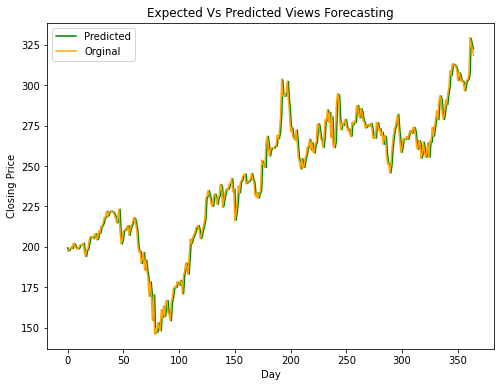

In [ ]:
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 0, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()